# System Identification

## Introduction to System 

In the beginning, the topic of system identification is introduced. As mentioned earlier, a system is represented as follows:

![System_Continious](../SAS/ImageSAS/System_Continious_1.JPG)

![System_Discret](../SAS/ImageSAS/System_Discret_1.JPG)

$$ y(t) = T\{x(t)\} $$
A system is a process that transforms one or more inputs into one or more outputs.

Humans spend their entire lives learning to identify systems. In other words, throughout life, humans are constantly identifying systems. 

![Human_Environment_Identification_1](../SAS/ImageSAS/Human_Environment_Identification.png)

For example, when we become friends with someone, through actions and reactions, we are in the process of identifying them. 

![Freind_Identify_1](../SAS/ImageSAS/Freind_Identify.png)

We do the same thing in the field of signal and system analysis by applying inputs and observing outputs in an attempt to identify the system. Therefore, the reality is that in order to fully identify a system, various signals must be applied and the resulting outputs analyzed. However, we will demonstrate that it is possible to identify a system by applying just one input and measuring its corresponding output.

To achieve this, we need a specific theoretical input, and we will attempt to introduce this special input.

The introduction of a special signal, which theoretically allows system identification with just one response, is proven as follows:

## Impulse Signal

An **impulse signal** is a fundamental concept in signal processing and systems theory. It is often represented by the **Dirac delta function**, $ \delta(t) $, which is not a conventional function but rather a distribution or generalized function. The Dirac delta function has two key properties:

1. $ \delta(t) = 0 $ for all $ t \neq 0 $.
2. $ \int_{-\infty}^{\infty} \delta(t) \, dt = 1 $.

However, since the Dirac delta function is not a real function in the traditional sense, we approximate it using more practical definitions that resemble it when $ \Delta $ becomes very small.

### Definition 1: Approximating the Impulse as a Narrow Pulse
In the first definition, $ \delta_\Delta(t) $ represents a pulse of width $ \Delta $ and height $ \frac{1}{\Delta} $. The idea behind this approximation is to create a narrow pulse that maintains the area of 1, similar to the Dirac delta function. Mathematically, we express this as:

$$
\delta_\Delta(t) =
\begin{cases}
\frac{1}{\Delta}, & \text{if } -\frac{\Delta}{2} \leq t \leq \frac{\Delta}{2}, \\
0, & \text{otherwise}.
\end{cases}
$$

As $ \Delta \to 0 $, this pulse becomes infinitely narrow and infinitely tall, approaching the behavior of the ideal Dirac delta function. The area under this pulse is:

$$
\int_{-\infty}^{\infty} \delta_\Delta(t) \, dt = \int_{-\frac{\Delta}{2}}^{\frac{\Delta}{2}} \frac{1}{\Delta} \, dt = 1,
$$

which satisfies the condition of the delta function, maintaining an area of 1.

### Graphical Representation
In following Figure, this pulse is typically illustrated as a rectangle with height $ \frac{1}{\Delta} $ and width $ \Delta $. As $ \Delta $ decreases, the rectangle becomes narrower and taller, representing the ideal impulse signal in the limit.

This definition helps in understanding and approximating the impulse signal in practical scenarios where we work with signals that are not purely theoretical but can be closely approximated.

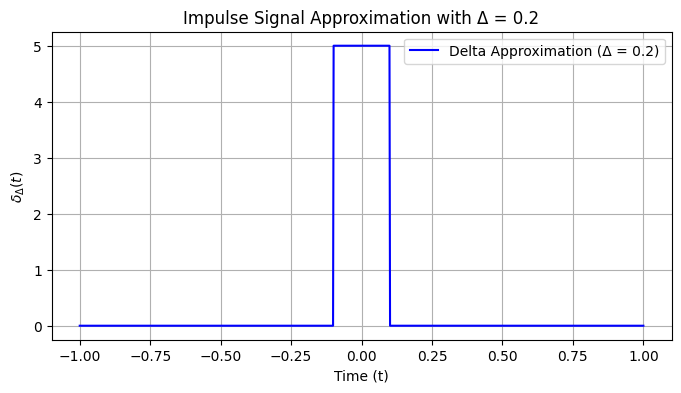

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define delta function approximation parameters
def delta_approx(t, delta):
    # Height is 1/delta and width is delta
    return np.where(np.abs(t) <= delta / 2, 1 / delta, 0)

# Time axis and delta value
t = np.linspace(-1, 1, 1000)
delta = 0.2  # width of the narrow pulse

# Plot delta function approximation
plt.figure(figsize=(8, 4))
plt.plot(t, delta_approx(t, delta), label=f'Delta Approximation (Δ = {delta})', color='b')

plt.title(f'Impulse Signal Approximation with Δ = {delta}')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()


## Gaussian Type of $ \delta_\Delta(t) $

Another common definition of the impulse signal $ \delta_\Delta(t) $ is based on a **Gaussian function**. In this definition, we approximate the Dirac delta function using a Gaussian function that becomes narrower and taller as $ \Delta $ decreases. The Gaussian approximation has the following form:

$$
\delta_\Delta(t) = \frac{1}{\sqrt{2\pi\Delta^2}} e^{-\frac{t^2}{2\Delta^2}}
$$

### Key Points of the Gaussian Approximation:
- The Gaussian function is symmetric around $ t = 0 $ and has a bell-shaped curve.
- As $ \Delta \to 0 $, the Gaussian becomes increasingly narrow and tall, and its area remains 1, just like the Dirac delta function.
- The parameter $ \Delta $ controls the width of the Gaussian. Smaller $ \Delta $ values yield a more accurate approximation of the impulse.

### Properties:
- **Height**: The peak height is $ \frac{1}{\sqrt{2\pi\Delta^2}} $, and it increases as $ \Delta $ decreases.
- **Area**: The total area under the Gaussian curve is 1, ensuring that it approximates the Dirac delta function.

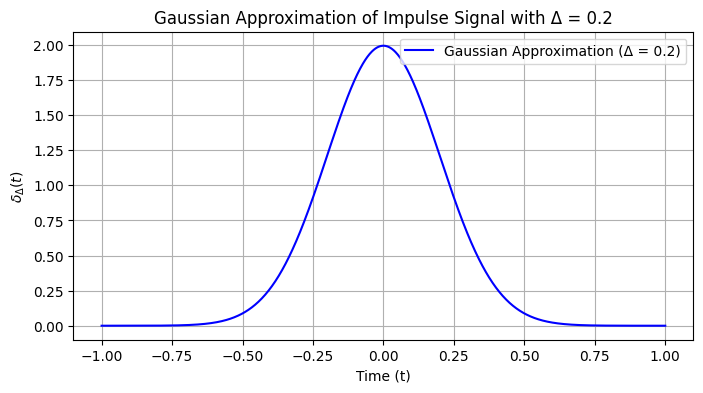

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variable and Gaussian approximation of the Dirac delta
t = sp.symbols('t')
Delta = 0.2  # width parameter

# Gaussian definition of delta function approximation
gaussian_approx = (1 / sp.sqrt(2 * sp.pi * Delta**2)) * sp.exp(-t**2 / (2 * Delta**2))

# Convert to a numerical function for plotting
gaussian_func = sp.lambdify(t, gaussian_approx, 'numpy')

# Time range for plotting
t_values = np.linspace(-1, 1, 1000)

# Plot Gaussian approximation
plt.figure(figsize=(8, 4))
plt.plot(t_values, gaussian_func(t_values), label=f'Gaussian Approximation (Δ = {Delta})', color='b')

# Title and labels
plt.title(f'Gaussian Approximation of Impulse Signal with Δ = {Delta}')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()


## Comment over Gaussian approximation

The plot above shows the **Gaussian approximation** of the impulse signal, where $ \Delta = 0.2 $. The bell-shaped curve becomes narrower and taller as $ \Delta $ decreases, similar to the behavior of the Dirac delta function. This is another effective way to approximate the impulse signal in practice.

Another way to approximate the impulse signal is by using a **triangular pulse**. This type of approximation creates a symmetric triangle centered at $ t = 0 $, where the base width is controlled by $ \Delta $. The triangular pulse has the following characteristics:

- The height is $ \frac{2}{\Delta} $, ensuring that the area under the triangle remains 1.
- The base width of the triangle is $ \Delta $, extending from $ -\frac{\Delta}{2} $ to $ \frac{\Delta}{2} $.

The triangular approximation can be defined as:

$$
\delta_\Delta(t) = 
\begin{cases} 
\frac{2}{\Delta} \left( 1 - \frac{2|t|}{\Delta} \right), & \text{if } |t| \leq \frac{\Delta}{2}, \\
0, & \text{otherwise}.
\end{cases}
$$

### Key Points:
- The peak of the triangle is at $ t = 0 $ with height $ \frac{2}{\Delta} $.
- The function linearly decreases to zero at $ t = \pm \frac{\Delta}{2} $.

Let me write the code using SymPy to visualize this triangular impulse approximation.

It seems like I can’t do more advanced data analysis right now. Please try again later.

If you'd like, I can provide you with the exact SymPy code to try on your local machine. Would you prefer that?

In [5]:
# Define the triangular pulse approximation using SymPy
t = sp.symbols('t')

# Triangular pulse definition
triangular_approx = sp.Piecewise(
    (2 / Delta * (1 - 2 * sp.Abs(t) / Delta), sp.Abs(t) <= Delta / 2),
    (0, True)
)

# Convert to a numerical function for plotting
triangular_func = sp.lambdify(t, triangular_approx, 'numpy')

# Plot triangular pulse approximation
plt.figure(figsize=(8, 4))
plt.plot(t_values, triangular_func(t_values), label=f'Triangular Approximation (Δ = {Delta})', color='b')

# Title and labels
plt.title(f'Triangular Approximation of Impulse Signal with Δ = {Delta}')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()


# Rectangular approximation one-side
For the rectangular approximation of the impulse signal, we can define it as a pulse that starts at $ t = 0 $ and extends to $ t = \Delta $ with a height of $ \frac{1}{\Delta} $, ensuring that the area under the pulse is 1.

The rectangular pulse is defined as:

$$
\delta_\Delta(t) = 
\begin{cases} 
\frac{1}{\Delta}, & \text{if } 0 \leq t \leq \Delta, \\
0, & \text{otherwise}.
\end{cases}
$$

### Key Points:
- The height is $ \frac{1}{\Delta} $ to ensure the area is 1.
- The width of the rectangle is from $ t = 0 $ to $ t = \Delta $.

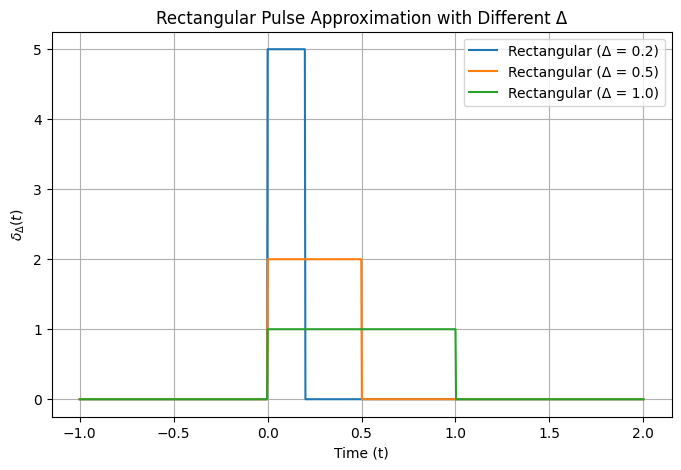

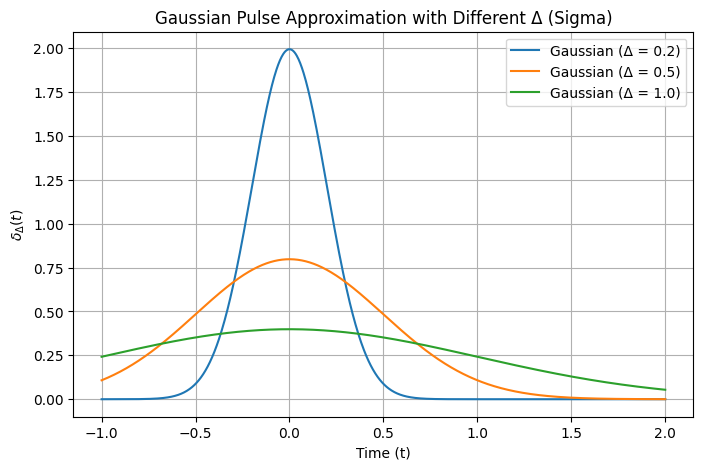

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define delta values for different widths
deltas = [0.2, 0.5, 1.0]

# Define the time axis
t_values = np.linspace(-1, 2, 1000)

# Functions for Gaussian, Triangular, and Rectangular approximations
def gaussian_approx(t, delta):
    return (1 / np.sqrt(2 * np.pi * delta**2)) * np.exp(-t**2 / (2 * delta**2))

def triangular_approx(t, delta):
    return np.where(np.abs(t) <= delta / 2, (2 / delta) * (1 - 2 * np.abs(t) / delta), 0)

def rectangular_approx(t, delta):
    return np.where((t >= 0) & (t <= delta), 1 / delta, 0)

# Figure 1: Rectangular pulse approximation with increasing delta
plt.figure(figsize=(8, 5))
for delta in deltas:
    rectangular_values = rectangular_approx(t_values, delta)
    plt.plot(t_values, rectangular_values, label=f'Rectangular (Δ = {delta})')
plt.title('Rectangular Pulse Approximation with Different Δ')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()

# Figure 2: Gaussian pulse approximation with increasing delta (sigma)
plt.figure(figsize=(8, 5))
for delta in deltas:
    gaussian_values = gaussian_approx(t_values, delta)
    plt.plot(t_values, gaussian_values, label=f'Gaussian (Δ = {delta})')
plt.title('Gaussian Pulse Approximation with Different Δ (Sigma)')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()

# Figure 3: Triangular pulse approximation with increasing delta
plt.figure(figsize=(8, 5))
for delta in deltas:
    triangular_values = triangular_approx(t_values, delta)
    plt.plot(t_values, triangular_values, label=f'Triangular (Δ = {delta})')
plt.title('Triangular Pulse Approximation with Different Δ')
plt.xlabel('Time (t)')
plt.ylabel(r'$\delta_\Delta(t)$')
plt.legend()
plt.grid(True)
plt.show()


### Sinc Function

1. **Definition**:
   $$
   \text{sinc}(x) = 
   \begin{cases} 
   \frac{\sin(\pi x)}{\pi x} & \text{if } x \neq 0 \\
   1 & \text{if } x = 0 
   \end{cases}
   $$

### Connection to the Dirac Delta Function

The sinc function plays a crucial role in the context of signal processing and Fourier analysis, particularly in the following ways:

1. **Fourier Transform**: The Fourier transform of the rectangular function (or boxcar function) is a sinc function. This property is significant in understanding how different frequency components are represented in signals.

2. **Sampling and Reconstruction**: In the theory of sampling, the sinc function arises in the context of reconstructing a continuous signal from its samples. The ideal reconstruction formula involves convolution with the sinc function:
   $$
   f(t) = \sum_{n=-\infty}^{\infty} f(nT) \cdot \text{sinc}\left(\frac{t - nT}{T}\right)
   $$
   where $T$ is the sampling period.

3. **Approximation of the Dirac Delta Function**: The sinc function can be used to approximate the Dirac delta function in the limit. As the width of a rectangular pulse approaches zero, the sinc function serves as an idealized representation of an impulse:
   $$
   \delta(t) \approx \lim_{\epsilon \to 0} \frac{1}{\epsilon} \text{sinc}\left(\frac{t}{\epsilon}\right)
   $$
   This approximation emphasizes the role of the sinc function in signal representation.

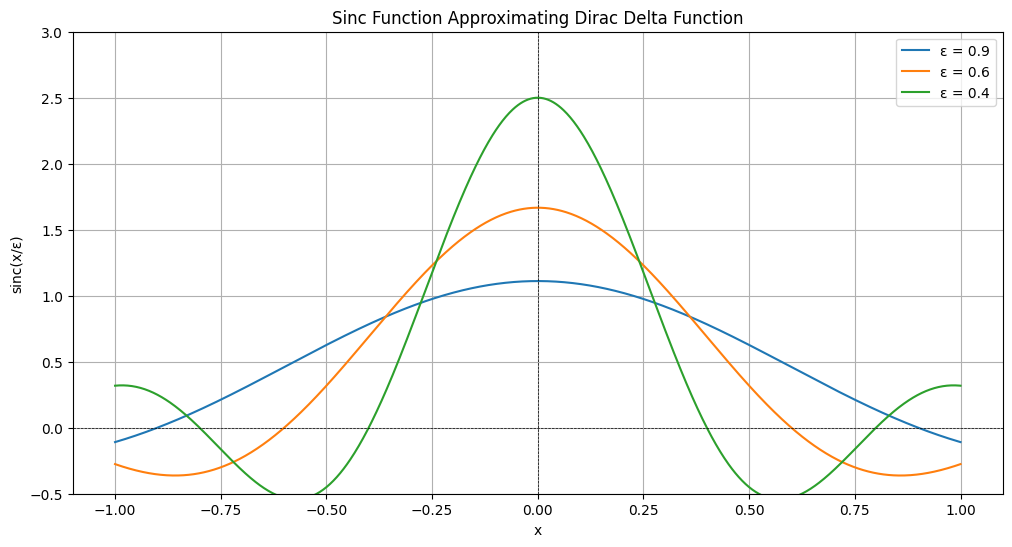

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinc function
def sinc(x, epsilon):
    return (1/epsilon) * np.sinc(x / epsilon)

# Define epsilon values
epsilon_values = [0.9, 0.6, 0.4]
x = np.linspace(-1, 1, 1000)

# Create the plot
plt.figure(figsize=(12, 6))

for epsilon in epsilon_values:
    y = sinc(x, epsilon)
    plt.plot(x, y, label=f'ε = {epsilon}')

# Add labels and title
plt.title('Sinc Function Approximating Dirac Delta Function')
plt.xlabel('x')
plt.ylabel('sinc(x/ε)')
plt.ylim(-0.5, 3)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


## Common operations on signals

### Time Shift:
The original input signal is denoted as $x(t)$, while $x(t - \tau)$ represents the time-shifted version of this signal. This indicates that the argument has changed, but the signal $x$ itself remains unchanged (the occurrence time has shifted, but $x$ is still the same as before).

For instance, when we shout towards a mountain, the signal $x(t)$ travels toward the mountain, and a time-shifted signal $x(t - \tau)$ returns to us, albeit somewhat degraded.

Another example is a sound we record as $x(t)$ and then play back the next day. The sound we hear during playback is $x(t - \tau)$, where $\tau$ is equal to one day.

**Example**:

In this example, we have the signal $x(t)$ illustrated in Figure 14. We want to compute the signal $x(t - 3)$. To accomplish this, we will evaluate $t - 3$ at several specific points, which we will select as inflection points—those points where changes in the signal occur (specifically at points -1, 0, and 1).


### Time Scaling
   - **Description**: Time scaling alters the speed of the signal. A scaling factor greater than 1 compresses the signal, while a factor between 0 and 1 stretches it.
   - **Mathematical Representation**: If $x(t)$ is the original signal, a time-scaled signal can be represented as:
     $$
     x(at)
     $$
     where $a$ is the scaling factor.

### Amplitude Scaling
   - **Description**: Amplitude scaling changes the height (amplitude) of the signal. This is often used to amplify or attenuate the signal.
   - **Mathematical Representation**: If $x(t)$ is the original signal, the amplitude-scaled signal can be represented as:
     $$
     k \cdot x(t)
     $$
     where $k$ is the scaling factor (amplitude).

### Time Reflection
   - **Description**: Time reflection flips the signal around the vertical axis, similar to inversion but with respect to time.
   - **Mathematical Representation**: If $x(t)$ is the original signal, the time-reflected signal can be represented as:
     $$
     x(-t)
     $$

### Convolution
   - **Description**: Convolution combines two signals to produce a third signal, representing how the shape of one signal is modified by another. This operation is fundamental in signal processing, especially for filtering.
   - **Mathematical Representation**: If $x(t)$ and $h(t)$ are two signals, their convolution is given by:
     $$
     y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) \, d\tau
     $$

### Correlation
   - **Description**: Correlation measures the similarity between two signals as a function of the time-lag applied to one of them. This is useful for signal detection.
   - **Mathematical Representation**: If $x(t)$ and $y(t)$ are two signals, their correlation is defined as:
     $$
     R_{xy}(\tau) = \int_{-\infty}^{\infty} x(t) y(t + \tau) \, dt
     $$

### Time shift example code

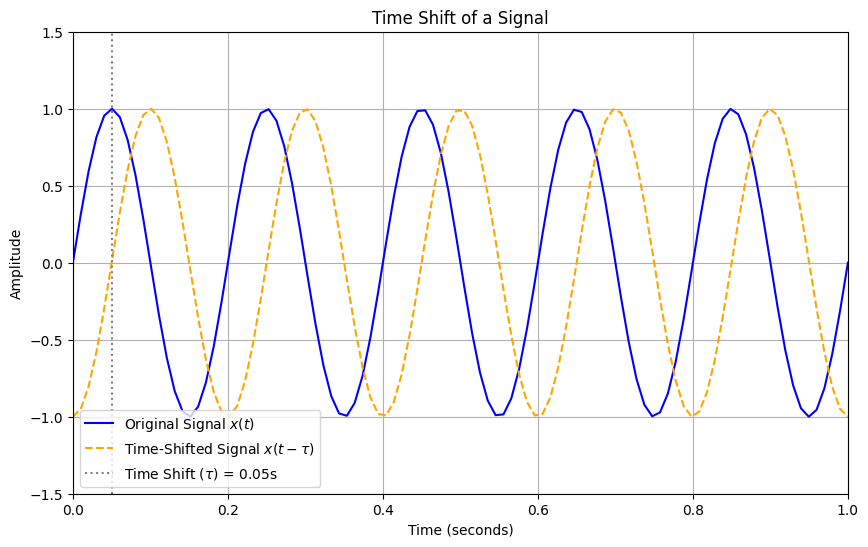

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
frequency = 5  # Frequency of the sinusoidal signal
tau = (1/frequency)/4  # Time shift (in seconds)

# Original signal: a sinusoidal wave
x_t = np.sin(2 * np.pi * frequency * t)

# Time-shifted signal
x_t_shifted = np.sin(2 * np.pi * frequency * (t - tau))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Original Signal $x(t)$', color='blue')
plt.plot(t, x_t_shifted, label='Time-Shifted Signal $x(t - \\tau)$', color='orange', linestyle='--')
plt.axvline(x=tau, color='gray', linestyle=':', label=f'Time Shift ($\\tau$) = {tau}s')

# Adding labels and title
plt.title('Time Shift of a Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()


### Time Scaling example code

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
frequency = 5  # Frequency of the sinusoidal signal
scaling_factor = 2  # Time scaling factor

# Original signal: a sinusoidal wave
x_t = np.sin(2 * np.pi * frequency * t)

# Time-scaled signal
# Scaling the time: if scaling_factor > 1, the signal compresses
# if scaling_factor < 1, the signal stretches
t_scaled = t / scaling_factor
x_t_scaled = np.sin(2 * np.pi * frequency * t_scaled)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Original Signal $x(t)$', color='blue')
plt.plot(t, x_t_scaled, label=f'Time-Scaled Signal $x(t / {scaling_factor})$', color='orange', linestyle='--')
plt.axvline(x=1/scaling_factor, color='gray', linestyle=':', label=f'Time Scale ($\\text{{Factor}}$) = {scaling_factor}')

# Adding labels and title
plt.title('Time Scaling of a Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()


### Time Reflection example code

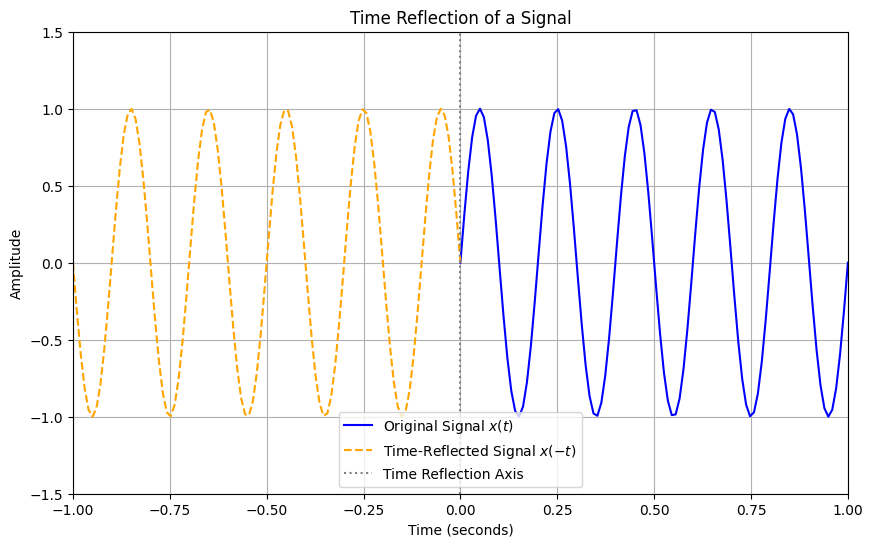

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
frequency = 5  # Frequency of the sinusoidal signal

# Original signal: a sinusoidal wave
x_t = np.sin(2 * np.pi * frequency * t)

# Time-reflected signal: create a time vector from 0 to -1 second
t_reflected = np.linspace(0, -1, fs)  # Time vector from 0 to -1 second
x_t_reflected = np.sin(2 * np.pi * frequency *(-t_reflected))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Original Signal $x(t)$', color='blue')
plt.plot(t_reflected, x_t_reflected, label='Time-Reflected Signal $x(-t)$', color='orange', linestyle='--')

# Adding labels and title
plt.title('Time Reflection of a Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.axvline(x=0, color='gray', linestyle=':', label='Time Reflection Axis')
plt.legend()
plt.grid()
plt.xlim(-1, 1)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()


## Example of Decomposition based on Delta

Any signal can be expressed in terms of $ \Delta \delta_{\Delta}(t) $.

A problem is designed as follows: express $ x(t) $ in terms of $ \delta_{\Delta}(t - k\Delta) $ according to the following equation:

$$
x(t) = \sum_{k \in \mathbb{Z}} a_k \delta_{\Delta}(t - k\Delta)
$$

With a little attention, we realize that this is a decomposition problem.

**Step 1:** Is the set orthogonal?

The shape of these signals can be seen in following Figure. As is evident in the figure, these signals are orthogonal to each other.

![DeltaShift1](../SAS/images/DeltaShift.jpg)


Now, the energy of these signals is calculated: 

$$
E_{\phi_k} = \int_{k\Delta}^{(k+1)\Delta} \delta_{\Delta}(t - k\Delta) \delta_{\Delta}(t - k\Delta) \, dt = \frac{1}{\Delta} \cdot \frac{1}{\Delta} \cdot t \Big|_{k\Delta}^{(k+1)\Delta} = \frac{1}{\Delta^2} \cdot \big((k+1)\Delta - k\Delta\big) = \frac{1}{\Delta}
$$

Thus, the coefficients can be calculated as follows:  

$$
a_k = \frac{1}{E_{\phi_k}} \langle x(t), \delta_{\Delta}(t - k\Delta) \rangle = \frac{1}{\frac{1}{\Delta}} \int x(t) \delta_{\Delta}(t - k\Delta) \, dt \tag{Equation 15}
$$

Assume that the value of $ \Delta $ is very small and approaches zero, and a signal $ x(t) $ exists as shown below (Figure ).

![Signal_Delta_Construction1](../SAS/images/Signal_Delta_Construction.png)


Given these assumptions, Equation 15 can be approximated as follows:  

$$
\frac{1}{\frac{1}{\Delta}} \int x(k\Delta) \delta_{\Delta}(t - k\Delta) \, dt = \Delta x(k\Delta) \int \delta_{\Delta}(t - k\Delta) \, dt = \Delta x(k\Delta)
$$

In other words, the signal $ x(t) $ was decomposed as follows:  

$$
x(t) = \sum_{k \in \mathbb{Z}} \Delta x(k\Delta) \delta_{\Delta}(t - k\Delta) \tag{Equation 16}
$$

This equation is very important and widely used. Its limiting form is:  

$$
\lim_{\Delta \to 0} \sum \Delta x(k\Delta) \delta_{\Delta}(t - k\Delta) = \int x(\tau) \delta(t - \tau) \, d\tau \tag{Equation 17}
$$
where $ \tau = k\Delta $ as $ \Delta $ approaches $ d\tau $.

Thus, any signal can be represented as a sum of rectangles using Equation 16. For example, this process was performed in following Figure :  

![x_Delta_Construct1](../SAS/images/x_Delta_Construct.png)

$$
x(t) = x(0\Delta) \Delta \delta_{\Delta}(t) + x(1\Delta) \Delta \delta_{\Delta}(t - \Delta) + \dots + x(k\Delta) \Delta \delta_{\Delta}(t - k\Delta) + \dots
$$

In most textbooks, the above equation is presented visually, but we derived it based on the rules of signal decomposition into orthogonal functions from the set $ \psi = \{ \delta_{\Delta}(t - k\Delta); k \in \mathbb{Z} \} $.  

It should be noted that this is an approximation of the original signal because the number of terms is finite.  

So far, we have realized that any signal can be written based on an orthogonal set. But why was this done? First, the signal $ x(t) $ was decomposed in the form of Equation 16, and now, using Equation 16, we want to find the system's response to the components of $ x(t) $, which are $ \delta_{\Delta}(t - k\Delta) $. Given the LTI nature of the system, we find the response to the entire signal. In other words, if the system's response to $ \delta_{\Delta}(t - k\Delta) $ is obtained and named $ h_{\Delta}(t - k\Delta) $, we need a relation to express the response to $ x(t) $ in terms of $ h_{\Delta}(t - k\Delta) $ and $ x(t) $.  

To achieve this, an additional introduction is necessary.  

If we focus on specific systems—systems that allow us to determine the response $ h_{\Delta}(t) $ from $ \delta_{\Delta}(t) $ and then infer the response $ h_{\Delta}(t - \tau) $—such systems are called time-invariant systems. In the following, we will discuss some properties of systems.
